In [5]:
! ls data/


BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [74]:
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [75]:
df = pd.read_csv('data/budget-sample.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


In [3]:
df.shape

(16660, 17)

In [4]:
df.isnull().sum()

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

In [5]:
#Check
df.isnull().sum()

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

In [6]:
#check dups
df.duplicated().sum()

0

Text(0, 0.5, 'Amount')

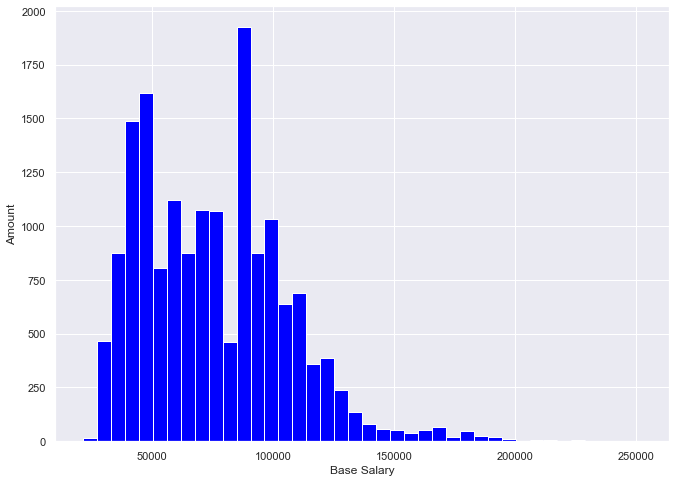

In [7]:
df['base_salary'].hist(bins = 40, figsize = (11,8), color = 'blue');
plt.xlabel('Base Salary')
plt.ylabel('Amount')

The Histograph shows that most people make around 80-90k or have a minimum wage job and the amount of base salaries that are above 100k exponential decrease as the amount goes up

<AxesSubplot:xlabel='base_salary'>

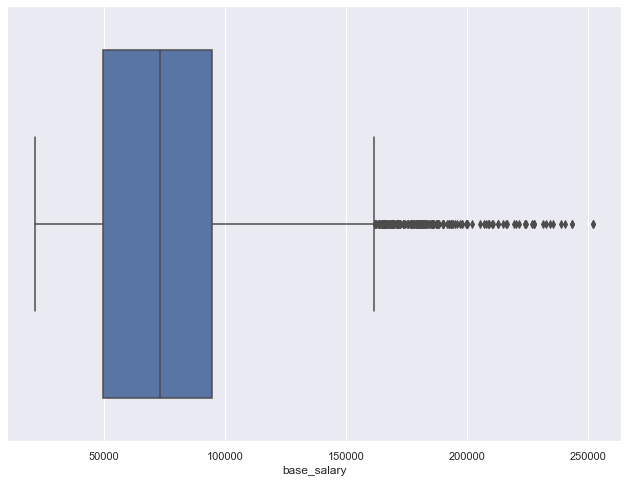

In [8]:
plt.subplots(figsize = (11,8))
sns.boxplot(data = df, x = 'base_salary')

Most of the base salaries are bewteen 50k to 100k and that there are still a great amount of base salaries more than 150k

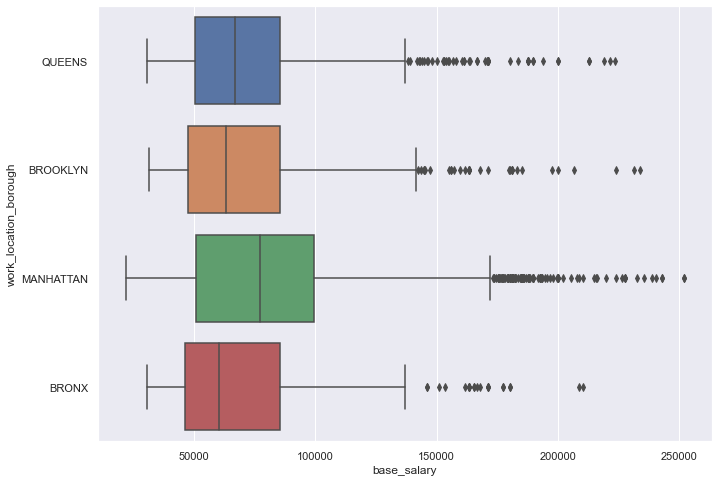

In [10]:
plt.subplots(figsize=(11,8))
sns.boxplot(data=df, x='base_salary', y = 'work_location_borough');

In [11]:
df['work_location_borough'].value_counts()

MANHATTAN    11083
QUEENS        2367
BROOKLYN      2121
BRONX         1089
Name: work_location_borough, dtype: int64

There are tons more jobs in Manhattan compared to the rest of the locations and the base salaries are on average higher and the amount of outlier salaries are also higher

Text(0.5, 0, 'Mean Base Salary')

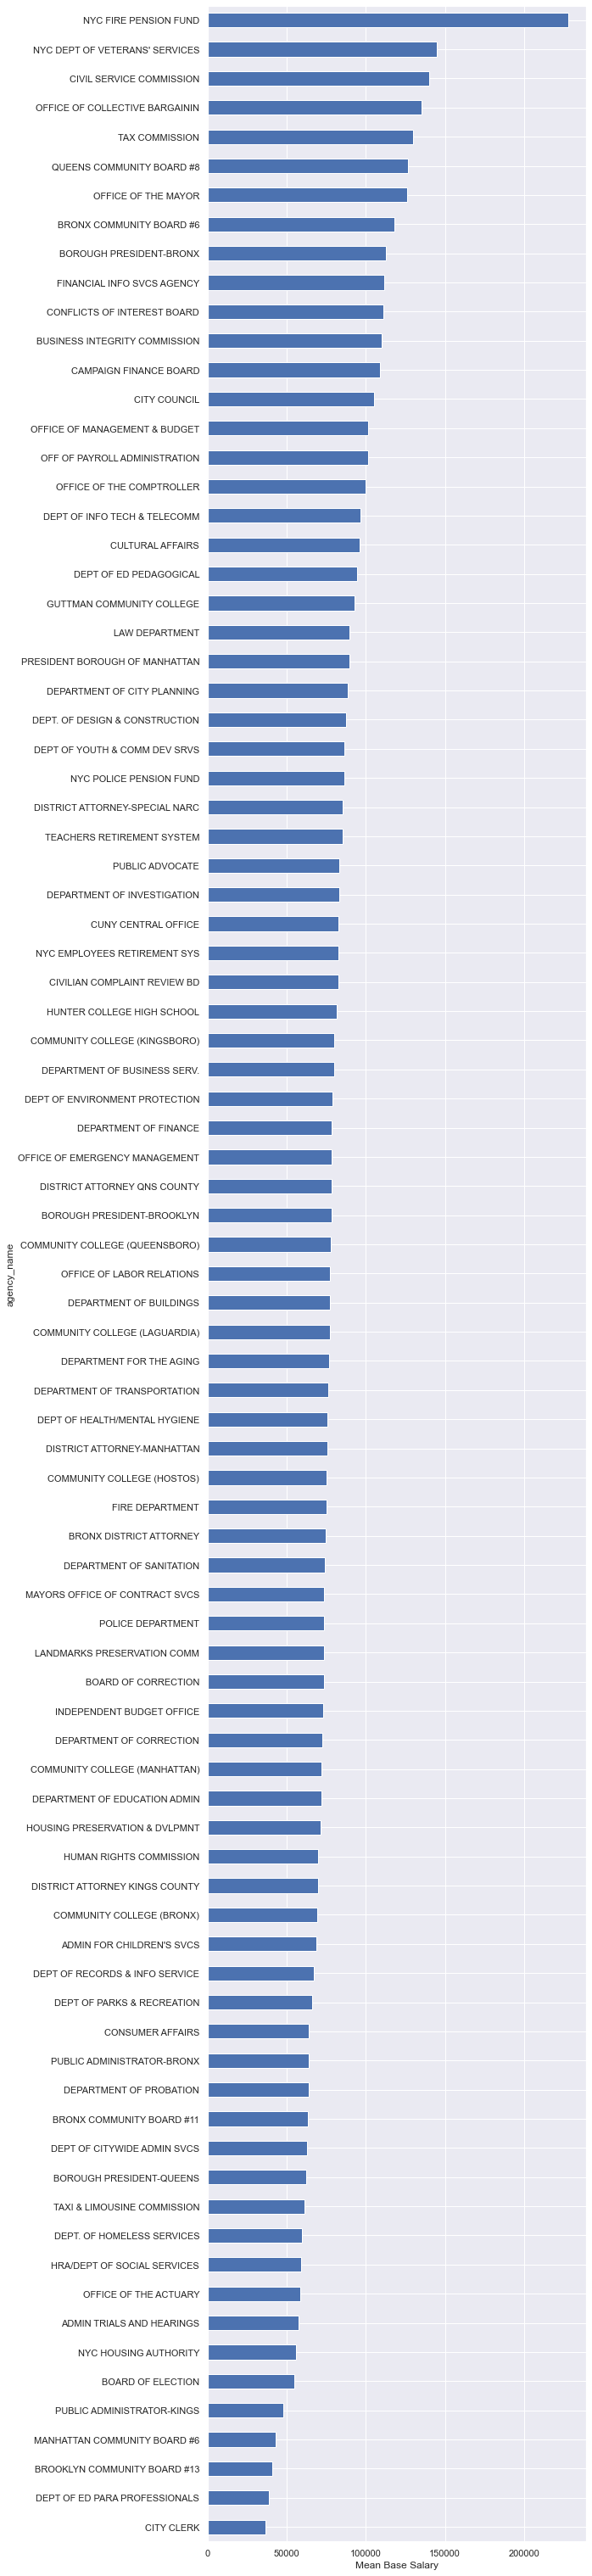

In [21]:
gb = df.groupby('agency_name')
mean_base_salary_of_agency = gb['base_salary'].mean().sort_values()
mean_base_salary_of_agency.plot(kind = 'barh', figsize = (8, 55))
plt.xlabel('Mean Base Salary')

I would want to work for NYC Fire Pension Fund

# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [24]:
df = pd.read_csv('data/BX-Police.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [25]:
df.shape

(2574, 17)

In [26]:
df.isnull().sum()

fiscal_year                      0
payroll_number                1059
agency_name                      0
last_name                        7
first_name                       7
mid_init                       821
agency_start_date                0
work_location_borough            0
title_description                0
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

In [27]:
df.duplicated().sum()

0

Text(0, 0.5, 'Mean Base Salary')

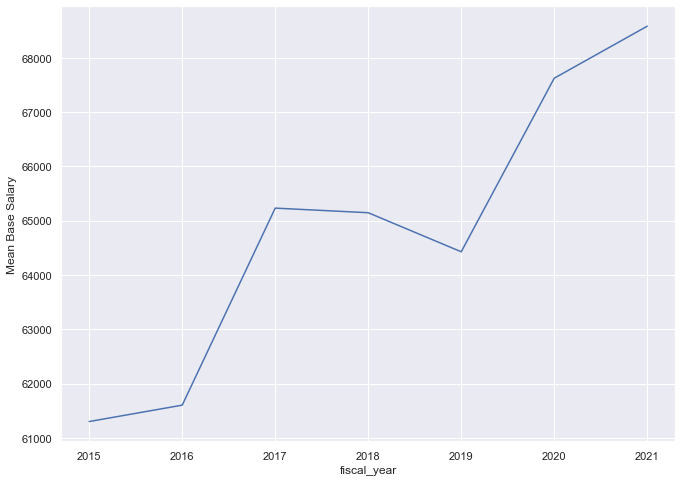

In [33]:
gb = df.groupby('fiscal_year')
mean_base_salary_of_fiscal_year = gb['base_salary'].mean()
mean_base_salary_of_fiscal_year.plot(kind = 'line', figsize = ( 11,8));
plt.ylabel('Mean Base Salary')

The time series shows that the mean of base salaries increase as the years go by. This increase could stem from multiple factors like inflation, cost of living increasing, oppurtunites for high paying jobs increased, etc.

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [35]:
df = pd.read_csv('data/Stocks.csv')
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


In [36]:
df.shape

(252, 8)

In [37]:
df.isnull().sum()

Date         0
Volume       0
High         0
Low          0
Open         0
Close        0
Adj Close    0
Ticker       0
dtype: int64

In [39]:
df.duplicated().sum()

0

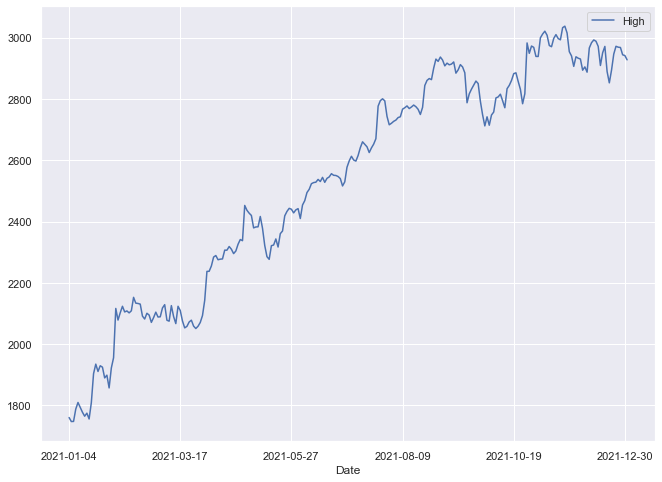

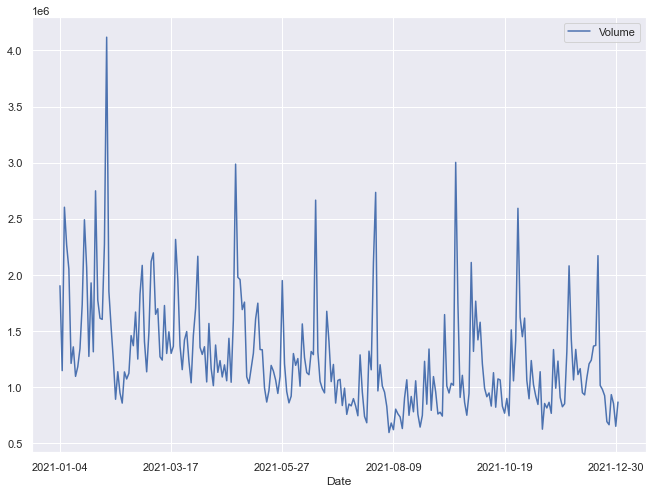

In [47]:
df.plot(kind = 'line', x = 'Date', y = 'High', label = 'High', figsize = (11,8))
df.plot(kind = 'line', x = 'Date', y = 'Volume', label = 'Volume', figsize = (11,8))

The Google Stock gradually increase and that when ever the volume spikes and dips the value of the stock at least dips a little but then raises. There is also always people that hold the stock no matter the price.

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [76]:
df = pd.read_csv('data/Sales.csv')
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


In [77]:
df.shape

(12, 7)

In [78]:
df.isnull().sum()

month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
dtype: int64

In [79]:
df.duplicated().sum()

0

Text(0, 0.5, 'Number of Sales')

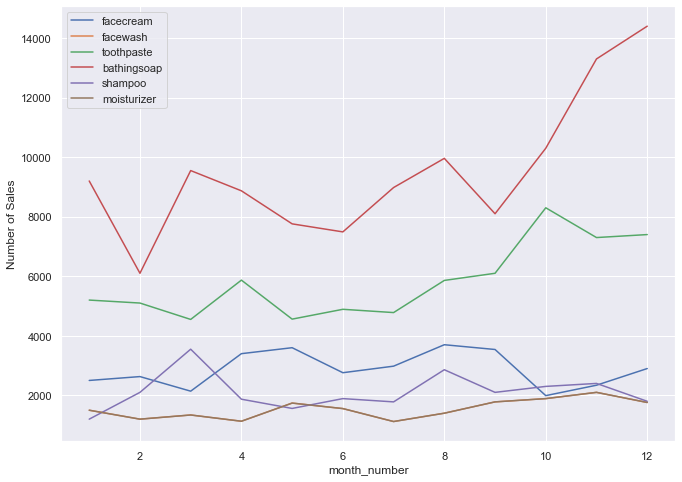

In [80]:
features = df.columns[1:]
df.plot(kind = 'line', x = 'month_number', y = features, figsize = (11,8))
plt.ylabel('Number of Sales')

The items are constantly selling but some items are selling much more in recent months like toothpaste and bathing soap.
I would recommend pushing bathing soap and toothpaste and dialing it back on moisturizer and shampoo.

In [81]:
total_sales = df[features].sum().sum()
items = df[features].sum()

percentage = items/total_sales * 100
percentage

facecream      12.277453
facewash        6.592722
toothpaste     24.893178
bathingsoap    40.596069
shampoo         9.047856
moisturizer     6.592722
dtype: float64

<AxesSubplot:title={'center':'Sales Percentage of Items'}>

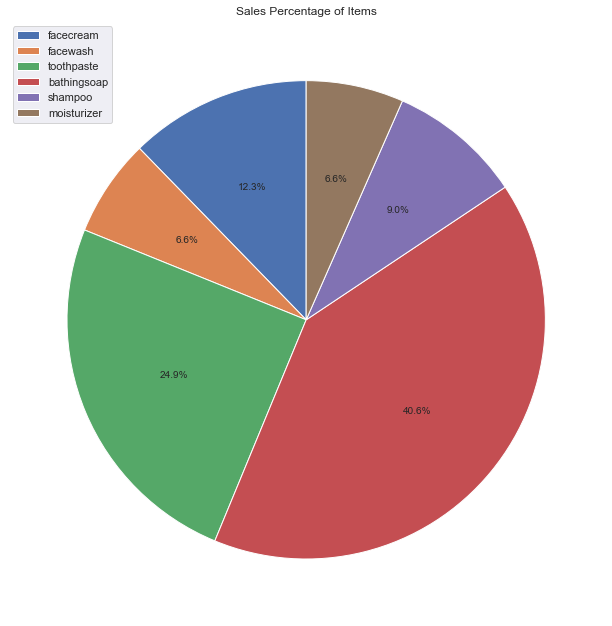

In [100]:
percentage.plot.pie(y=features,
                    startangle=90,
                    autopct='%1.1f%%',
                    legend = True,
                    ylabel = '',
                    title = 'Sales Percentage of Items',
                    labeldistance = None,
                    figsize = (13,11))
